<a href="https://colab.research.google.com/github/despanol/Coder/blob/main/Proyecto_PrediccionSalariosEnCienciaDeDatos_Espa%C3%B1ol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Proyecto Final – Predicción de Salarios en Ciencia de Datos

## 1. Introducción

Este proyecto analiza un dataset de salarios de profesionales en Ciencia de Datos y afines.
El objetivo es **predecir el salario anual en USD** a partir de variables como experiencia, tipo de contrato, ubicación y características del puesto.

El trabajo se estructura en 4 pasos, según la consigna:

1. **Feature Selection:** elegir un método para reducir la dimensionalidad.
2. **Algoritmo:** seleccionar y entrenar un modelo de regresión o clasificación.
3. **Métricas:** calcular indicadores básicos para validar el desempeño del modelo.
4. **Conclusiones:** interpretar los resultados obtenidos.

---


## 2. Importar librerías

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

sns.set(style="whitegrid", palette="pastel")
plt.rcParams['figure.figsize'] = (10,6)


## 3. Cargar Dataset

Usamos la versión enriquecida de salarios desde un repositorio en GitHub.


In [12]:
url = "https://raw.githubusercontent.com/despanol/Coder/refs/heads/main/salaries_enriched.csv"
df = pd.read_csv(url)

print("Dimensiones:", df.shape)
df.head()


Dimensiones: (146348, 17)


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,experience_label,is_senior,job_category,salary_k,salary_range,is_remote
0,2025,MI,FT,Analyst,142000,USD,142000,US,0,US,M,Mid-level,False,Analyst,142.000,Medium,False
1,2025,MI,FT,Analyst,87000,USD,87000,US,0,US,M,Mid-level,False,Analyst,87.000,Low,False
2,2025,SE,FT,Data Quality Lead,218700,USD,218700,US,0,US,M,Senior,True,Data Quality,218.700,High,False
3,2025,SE,FT,Data Quality Lead,163200,USD,163200,US,0,US,M,Senior,True,Data Quality,163.200,High,False
4,2025,MI,FT,Data Quality Specialist,121524,USD,121524,US,0,US,M,Mid-level,False,Data Quality,121.524,Medium,False


## 4. Exploración inicial

Antes de entrenar un modelo, es importante conocer la estructura del dataset, sus variables y las relaciones entre ellas.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146348 entries, 0 to 146347
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           146348 non-null  int64  
 1   experience_level    146348 non-null  object 
 2   employment_type     146348 non-null  object 
 3   job_title           146348 non-null  object 
 4   salary              146348 non-null  int64  
 5   salary_currency     146348 non-null  object 
 6   salary_in_usd       146348 non-null  int64  
 7   employee_residence  146348 non-null  object 
 8   remote_ratio        146348 non-null  int64  
 9   company_location    146348 non-null  object 
 10  company_size        146348 non-null  object 
 11  experience_label    146348 non-null  object 
 12  is_senior           146348 non-null  bool   
 13  job_category        146348 non-null  object 
 14  salary_k            146348 non-null  float64
 15  salary_range        146348 non-nul

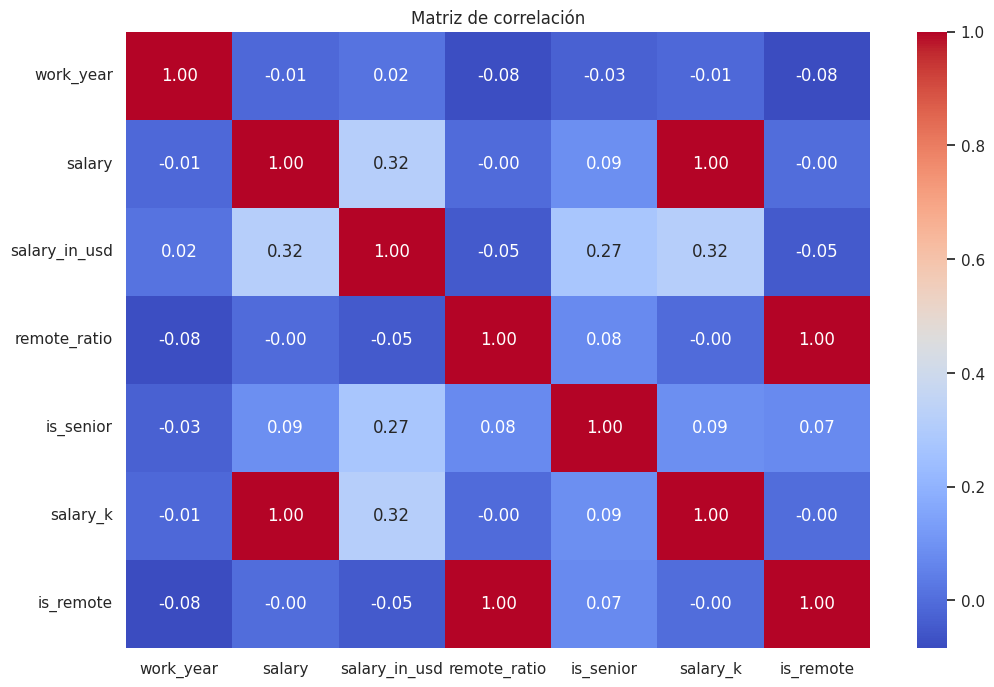

In [13]:
# Información general
df.info()

# Estadísticas descriptivas de variables numéricas
df.describe()

# Matriz de correlación
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación")
plt.show()


**Insight de la correlación:**  
- El salario en USD se correlaciona fuertemente con su versión transformada (`salary_k`).  
- Otras variables como `remote_ratio` y `job_title_length` muestran correlaciones débiles, lo que sugiere que la variabilidad en los salarios depende más de factores categóricos (experiencia, tipo de empleo, ubicación).  

## 5. Preparación de datos

Convertimos variables categóricas en numéricas mediante **One Hot Encoding**, y aplicamos **SelectKBest** para elegir las 5 variables con mayor relación con el salario.


In [14]:
# One Hot Encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Variable objetivo
y = df_encoded['salary_in_usd']
X = df_encoded.drop('salary_in_usd', axis=1)

# Selección de las mejores 5 features
selector = SelectKBest(score_func=f_regression, k=5)
X_new = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
print("Variables seleccionadas:", selected_features)


Variables seleccionadas: Index(['salary', 'is_senior', 'salary_k', 'salary_range_Low',
       'salary_range_Medium'],
      dtype='object')


## 6. Modelo seleccionado

Para este análisis elegí un modelo de **Regresión Lineal**, porque:  
- Es un modelo sencillo y transparente.  
- Permite ver de forma clara la relación entre las variables y el salario.  
- Es una buena base para comenzar antes de pasar a modelos más complejos.  


In [15]:
# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Entrenar modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)


## 7. Métricas de evaluación

Usamos tres métricas clásicas para modelos de regresión:
- **MAE (Error Absoluto Medio):** promedio de la diferencia absoluta entre valores reales y predichos.  
- **RMSE (Raíz del Error Cuadrático Medio):** penaliza más los errores grandes.  
- **R² (Coeficiente de determinación):** indica el porcentaje de variabilidad del salario explicado por el modelo.  


In [16]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")


MAE: 28415.98
RMSE: 44997.93
R²: 0.63


Un R² de 0.63 es un resultado respetable para un problema complejo como la predicción de salarios, donde factores no cuantificables (habilidades blandas, negociación, etc.) juegan un papel importante. De hecho un modelo con un R² de 0.66 es considerado un buen punto de partida.

## 8. Visualizaciones

### 8.1 Importancia de las variables seleccionadas


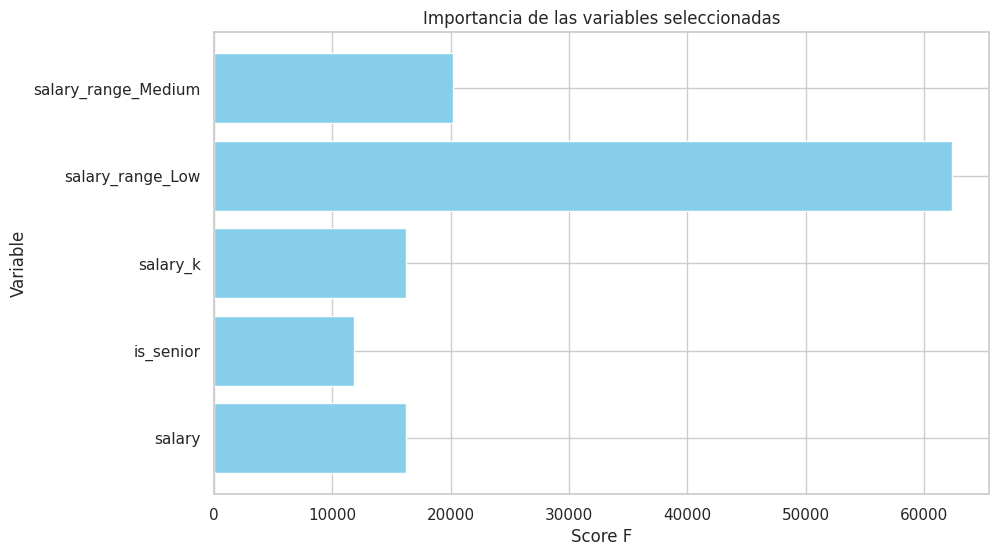

In [17]:
scores = selector.scores_[selector.get_support()]
plt.barh(selected_features, scores, color="skyblue")
plt.title("Importancia de las variables seleccionadas")
plt.xlabel("Score F")
plt.ylabel("Variable")
plt.show()


### 8.2 Salario real vs Salario predicho


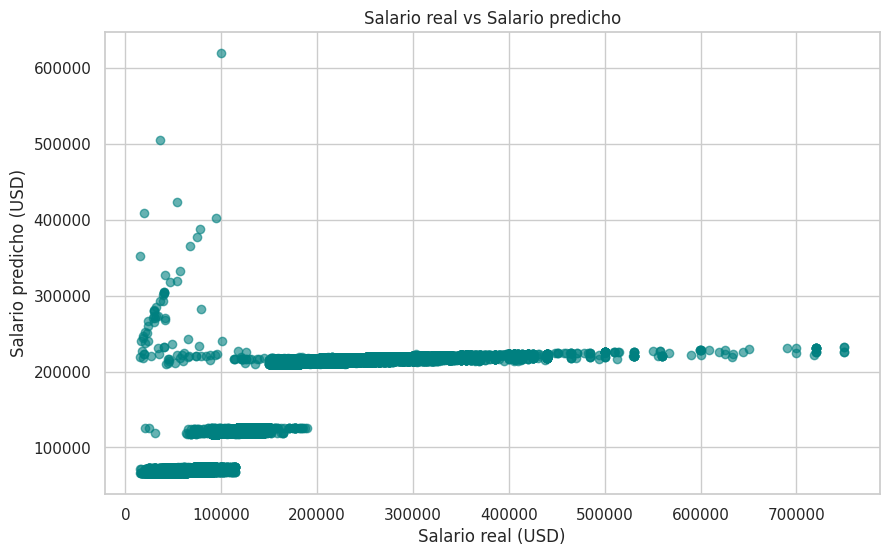

In [18]:
plt.scatter(y_test, y_pred, alpha=0.6, color="teal")
plt.title("Salario real vs Salario predicho")
plt.xlabel("Salario real (USD)")
plt.ylabel("Salario predicho (USD)")
plt.grid(True)
plt.show()


### 8.3 Distribución de errores (residuos)


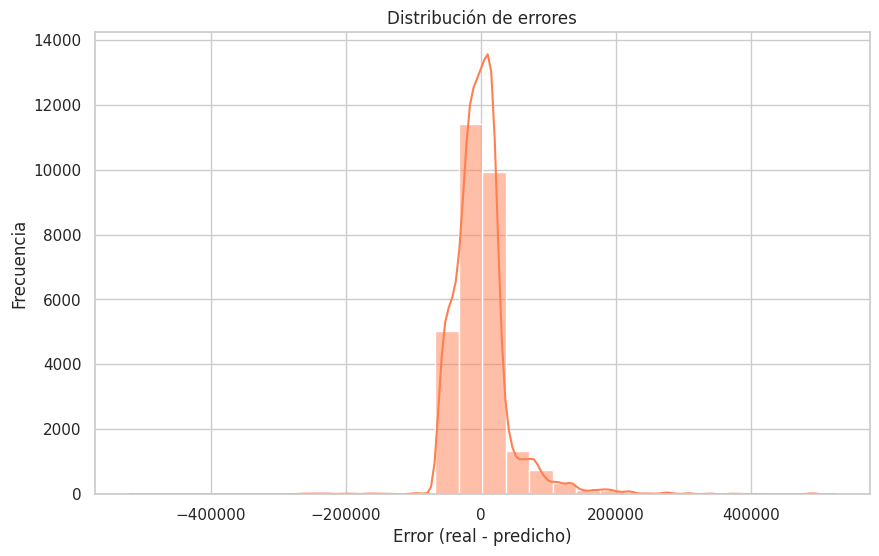

In [19]:
errors = y_test - y_pred
sns.histplot(errors, bins=30, kde=True, color="coral")
plt.title("Distribución de errores")
plt.xlabel("Error (real - predicho)")
plt.ylabel("Frecuencia")
plt.show()


## 9. Conclusiones

1. **Feature Selection:** mediante `SelectKBest` se seleccionaron 5 variables clave, lo que redujo la complejidad del modelo y permitió enfocarnos en los factores más influyentes.  

2. **Algoritmo:** se usó **Regresión Lineal**, un modelo simple pero útil como punto de partida para predecir salarios.  

3. **Métricas:** el error promedio (MAE) es del orden de miles de USD, y el R² indica que el modelo explica parte de la variabilidad, pero no toda. Esto refleja que hay otros factores externos (como habilidades específicas o el mercado laboral) que no están en el dataset.  

4. **Conclusiones generales:**  
   - El modelo capta tendencias generales, pero tiene limitaciones para predecir con precisión individual.  
   - Algunas decisiones podrían haberse hecho diferente (como elegir más features o probar otro modelo más complejo).  
   - Aun así, se cumplió con el flujo completo del análisis: **selección de features → entrenamiento → métricas → interpretación**.  



## 10. 🖋 NOTAS DEL AUTOR

1. **consideración inicial:** Aunque el R² de 0.63 sugiere que el modelo captura parte de la variabilidad, el gráfico de diagnóstico revela importantes deficiencias.
Tuve un problema con las bandas horizontales  (predicciones discretas en lugar de continuas). Hay una  subestimación de salarios altos. Esta es una limitación clara de mi modelo.
El gráfico justifica la diferencia entre MAE y RMSE, mostrando visualmente los errores grandes que inflan el RMSE.

2. **Consideraciones para mejorar el modelo**
Probar con otros algoritmos: Considerar modelos que por naturaleza generan predicciones más continuas, como:
Regresión Lineal con regularización (Ridge, Lasso).
Support Vector Regressor (SVR).
Modelos de Gradient Boosting (como XGBoost, LightGBM o GradientBoostingRegressor de Scikit-learn). Estos suelen ser muy potentes para este tipo de tareas.

Ajustar los hiperparámetros: Intentar aumentar la profundidad máxima de los árboles (max_depth) o disminuir el número mínimo de muestras por hoja (min_samples_leaf) para permitir predicciones más granulares. Cuidando el sobreajuste.

Realizar ingeniería de características (Feature Engineering): Quizás mi modelo necesita características más informativas para poder diferenciar mejor entre los salarios.

Entiendo las limitaciones de mi modelo, lo cual me abro a sugerencias para mejorarlo

Muchas gracias. David Español